#### 使用SVD压缩图片

In [1]:
import numpy as np
from PIL import Image
from sys import getsizeof
import matplotlib.pyplot as plt
%matplotlib inline

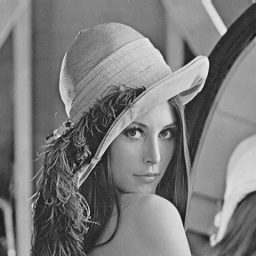

In [2]:
picture=Image.open('lena.jpg')
picture  #先查看一下原图

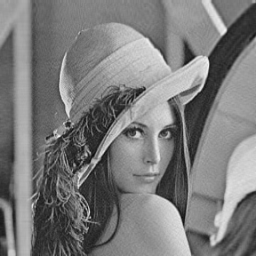

In [3]:
def svd_picture(image_array,singular_ratio=0.9):      #奇异值占比
    U,sigma,V_t=np.linalg.svd(image_array)  #奇异值分解
    singular_values=0         #奇异值之和
    for i,s in enumerate(sigma):
        singular_values=s+singular_values     #当前奇异值之和
        if (singular_values/np.sum(sigma))>singular_ratio:  #当奇异值之和占比大于约定占比
            sigma=sigma[:i]
            break
    U,sigma,V_t=U[:,0:i],sigma,V_t[0:i,:]               #截取之后的特征矩阵项
    new_image_array=U.dot(np.diag(sigma)).dot(V_t)       #新和成矩阵
    new_image_array=new_image_array.astype('uint8')     #根据JPG格式转化数值
    new_image=Image.fromarray(new_image_array)         #将Numpy.array转化为Imagine对象
    orignal_size=getsizeof(image_array)
    return new_image
picture=Image.open('lena.jpg')
image_array=np.array(picture)
svd_picture(image_array,singular_ratio=0.9)  #我们可以看到使用奇异值分解获得的90%的奇异值得到的结果,和原图基本一致

#### 使用K-means压缩图片

1200 900
<class 'matplotlib.axes._subplots.AxesSubplot'>


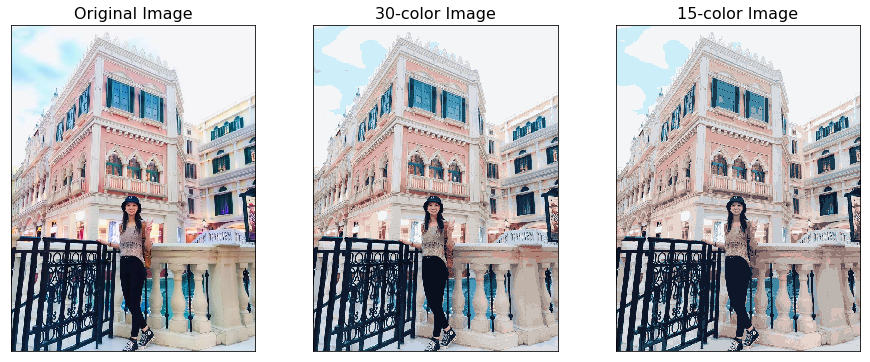

In [7]:
from sklearn.cluster import MiniBatchKMeans  #MiniBatchKMeans是大数据上的K-means优化版本
from PIL import Image

def k_means_picture(image_array,n_clusters=30):
    image_array = image_array / 255.0 #将其颜色值转换成0~1区间值
    m,n,_=image_array.shape
    print(m,n)
    image_array = image_array.reshape(m*n,3) #将数据变形为[n_samples,n_features]矩阵格式

    kmeans = MiniBatchKMeans(n_clusters=n_clusters)  #用n_clusters种颜色对图像进行聚类
    kmeans.fit(image_array)
    new_colors = kmeans.cluster_centers_[kmeans.predict(image_array)]
    recolored1 = new_colors.reshape((m, n, 3))

    kmeans = MiniBatchKMeans(n_clusters=int(n_clusters/2))  #用n_clusters/2种颜色对图像进行聚类
    kmeans.fit(image_array)
    new_colors = kmeans.cluster_centers_[kmeans.predict(image_array)]
    recolored2= new_colors.reshape((m, n, 3))

    fig,ax = plt.subplots(1,3,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
    fig.subplots_adjust(wspace=0.05)

    ax[0].imshow(image_array.reshape((m, n, 3)))
    ax[0].set_title('Original Image',size=16)
    ax[1].imshow(recolored1)
    ax[1].set_title('%d-color Image'%(n_clusters),size=16)
    ax[2].imshow(recolored2)
    ax[2].set_title('%d-color Image'%(n_clusters*0.5),size=16)

    print(type(ax[2]))
image_array = np.array(Image.open("MyHigness.jpeg"))
k_means_picture(image_array=image_array)